# Análise de dados da Maratona de Lochness

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from datetime import datetime
warnings.simplefilter("ignore")

### Lendo os dados da maratona de Lochness de 2003 até 2018

In [19]:
import glob
import re
all_editions = []
for result in glob.glob('./*.csv'):
    df= pd.read_csv(result)
    df['Year'] =  re.search(r'\d+', result).group()
    all_editions.append(df)

compilation = pd.concat(all_editions) # combine all dataframes
compilation

,position,bib,firstname,lastname,halftime,guntime,chiptime,category,Year
0,1,1,Isaiah,KOSGEI,01:11:15,02:29:31,02:29:31,Mara-M40,2019
1,2,14,Nick,HARRIS-FRY,01:18:46,02:36:30,02:36:30,Mara-MS,2019
2,3,1239,Ed,REES,01:16:34,02:37:09,02:37:09,Mara-MS,2019
3,4,4905,Jonas,MULLER,01:15:48,02:39:16,02:39:16,Mara-MS,2019
4,5,750,Geraint,WILLIAMS,01:18:03,02:39:40,02:39:39,Mara-MS,2019
...,...,...,...,...,...,...,...,...,...
2473,2474,3248,Ann,Tomlin,NaN,07:21:56,07:19:24,F40,2014
2474,2475,349,Susan,Laverock,NaN,07:24:59,07:19:24,FS,2014
2475,2476,2401,Iain,Whyte,NaN,07:24:28,07:19:25,M50,2014
2476,2477,1576,Tracey-Anne,West,NaN,07:24:29,07:19:49,FS,2014


In [36]:
def convert_to_minutes(row):
    return sum(i*j for i, j in zip(map(float, row['chiptime'].split(':')), [60, 1, 1/60]))

def get_gender(row):
    if 'F' in row:
        return 'F'
    elif 'M' in row:
        return 'M'
    else:
        return 'UNK'

compilation['chiptime_minutes'] = compilation.apply(convert_to_minutes, axis=1) # add a minutes field

compilation['gender']=compilation['category'].apply(get_gender) #infer sex
compilation.head()


,position,bib,firstname,lastname,halftime,guntime,chiptime,category,Year,chiptime_minutes,gender
0,1,1,Isaiah,KOSGEI,01:11:15,02:29:31,02:29:31,Mara-M40,2019,149.516667,M
1,2,14,Nick,HARRIS-FRY,01:18:46,02:36:30,02:36:30,Mara-MS,2019,156.500000,M
2,3,1239,Ed,REES,01:16:34,02:37:09,02:37:09,Mara-MS,2019,157.150000,M
3,4,4905,Jonas,MULLER,01:15:48,02:39:16,02:39:16,Mara-MS,2019,159.266667,M
4,5,750,Geraint,WILLIAMS,01:18:03,02:39:40,02:39:39,Mara-MS,2019,159.650000,M


### Vamos visualizar a distribuição dos tempos de prova líquida

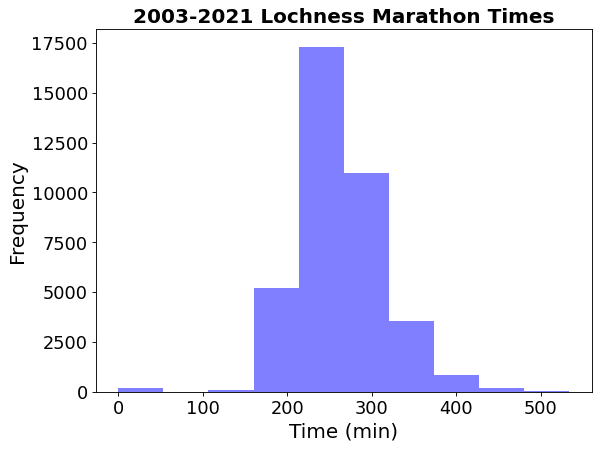

In [26]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(compilation['chiptime_minutes'], facecolor='blue', alpha=0.5)
plt.title('2003-2021 Lochness Marathon Times', fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

Text(0, 0.5, 'Minutes')

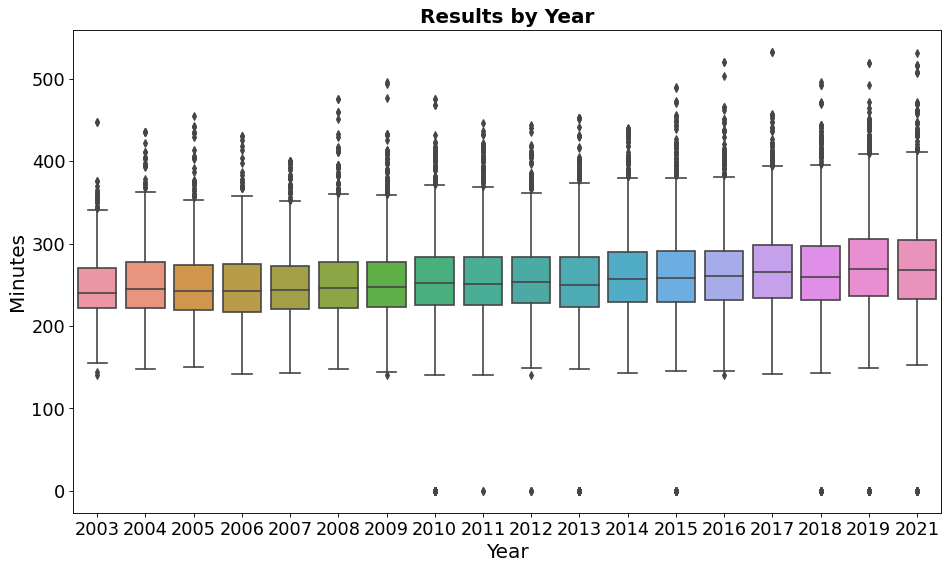

In [39]:
import seaborn as sns # plotting

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="Year", y="chiptime_minutes", data=compilation, order=['2003', '2004', '2005', '2006', '2007', '2008', '2009', \
                 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2021'])
plt.title('Results by Year', fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Minutes", fontsize=18)

Text(0, 0.5, 'Minutes')

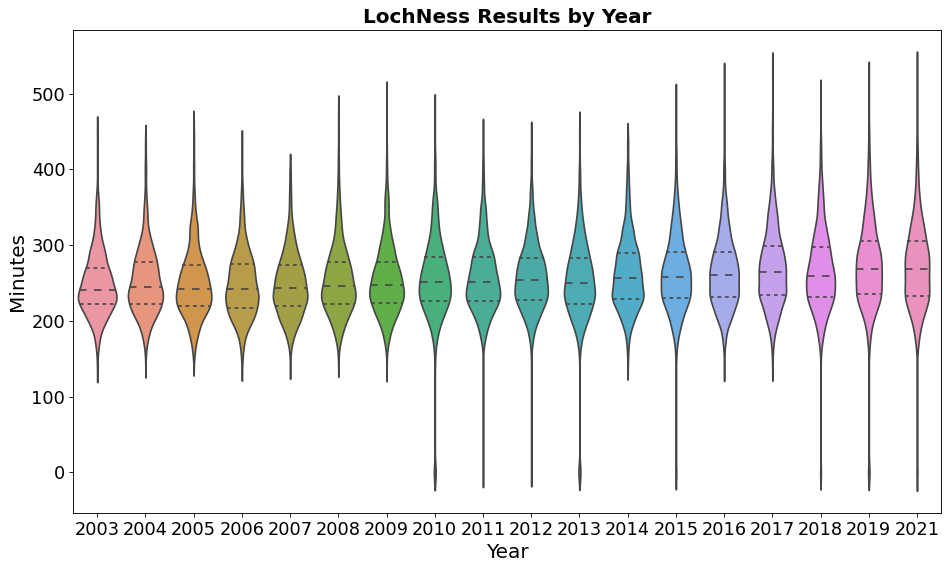

In [40]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(x="Year", y="chiptime_minutes", data=compilation, inner='quartile',
        order=['2003', '2004', '2005', '2006', '2007', '2008', '2009', \
                 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2021'])
plt.title('LochNess Results by Year', fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Minutes", fontsize=18)

Text(0, 0.5, 'Minutes')

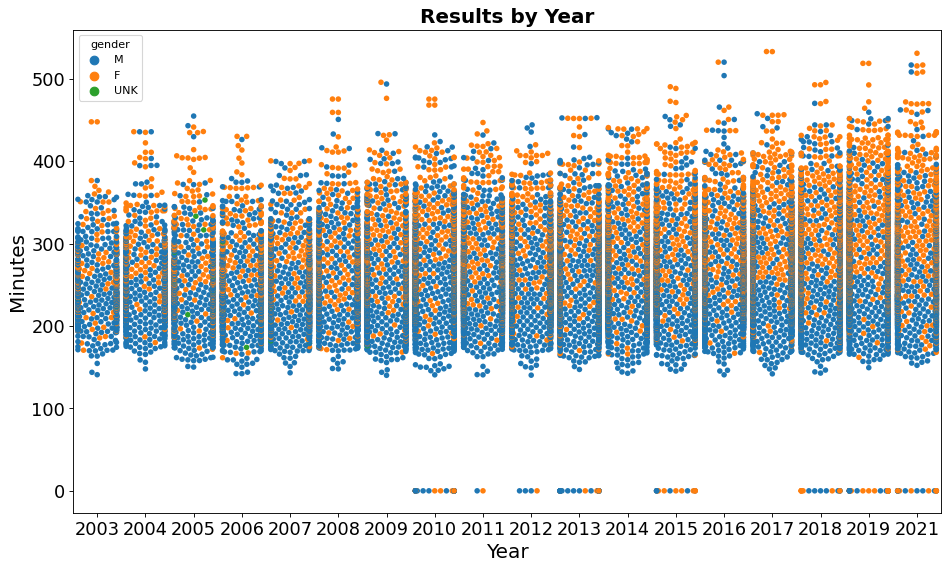

In [41]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.swarmplot(x="Year", y="chiptime_minutes", hue='gender', data=compilation,
order=['2003', '2004', '2005', '2006', '2007', '2008', '2009', \
                 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2021'])
plt.title('Results by Year', fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Minutes", fontsize=18)

### Olhando para sexo masculino da minha faixa etária, vamos ver meu possível desempenho

In [65]:
def normalize_categories(row):
    if row in ['M40+', 'Mara-M40', 'M40', 'Male 40+', 'MU40', 'MALE40+', 'M40+/MOPEN']:
        return 'M-40'
    elif row in ['MOPEN', 'Mara-MS', 'MS','Male', 'MALE']:
        return 'M-Open'
    elif row in ['M50+', 'Mara-M50', 'M50', 'Male 50+', 'MALE50+']:
        return 'M-50'
    elif row in ['M60+', 'Mara-M60', 'M60', 'Male 60+', 'MALE60+']:
        return 'M-60'
    elif row in ['M70+', 'Mara-M70', 'M70', 'M-70']:
        return 'M-70'
    else:
        return row


# subset only men's results
men = compilation.loc[compilation['gender'] == 'M']
men['class']=men['category'].apply(normalize_categories) #normalize categories

Text(0, 0.5, 'Minutes')

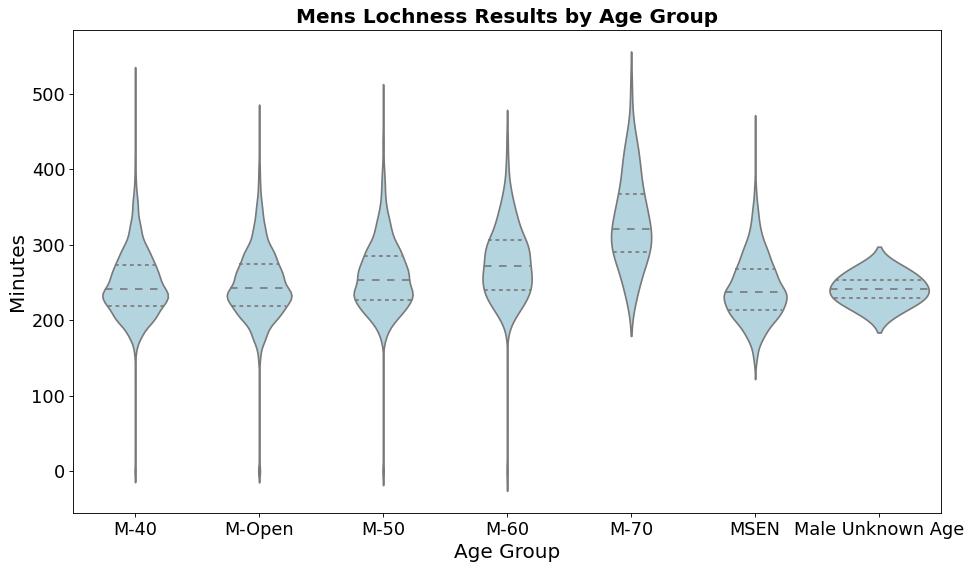

In [66]:
# plot violin and swarm plots by age group
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(x="class", y="chiptime_minutes", data=men, color='lightblue', inner='quartile')
plt.title('Mens Lochness Results by Age Group', fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Minutes", fontsize=18)

In [75]:
# The mean of official time for the set of Category 
mean_age_time = men.groupby('class').mean()
mean_age_time['class'] = mean_age_time.index 
mean_age_time['chiptime_hours'] = mean_age_time['chiptime_minutes'] /60
mean_age_time.head()

,bib,chiptime_minutes,class,chiptime_hours
class,,,,
M-40,1864.564745,247.984340,M-40,4.133072
M-50,1874.004242,258.365032,M-50,4.306084
M-60,1848.862939,276.244444,M-60,4.604074
M-70,1583.092308,332.116410,M-70,5.535274
M-Open,2147.127193,247.607423,M-Open,4.126790


In [76]:
# The median of official time for the set of Age 
median_age_time = men.groupby('class').median()
median_age_time['class'] = median_age_time.index
median_age_time['chiptime_hours'] = median_age_time['chiptime_minutes'] /60
median_age_time.head()

,bib,chiptime_minutes,class,chiptime_hours
class,,,,
M-40,1743,241.633333,M-40,4.027222
M-50,1748,253.058333,M-50,4.217639
M-60,1656,271.975000,M-60,4.532917
M-70,1306,320.116667,M-70,5.335278
M-Open,2122,241.950000,M-Open,4.032500


In [70]:
# subset my age group results
group_times = men['chiptime_minutes'].where(men['class'] == 'M-Open').dropna()
# 25, 50 and 75 percentiles for total time and calculated per km pace
print(np.round(np.percentile(group_times, [25, 50, 75]), 1))
print(np.round(np.percentile(group_times, [25, 50, 75]) / 25, 1))

[218.6 242.  274.4]
[ 8.7  9.7 11. ]


### Para ficar no ponto de corte, fazer o tempo de 4hrs  57min
### Para ficar no top 50% - 4rs 3min
### Ficar no top 25% - 3hrs e 33min